In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import string

In [2]:
data=pd.read_csv('/content/twitter_training.csv',on_bad_lines='skip')

In [3]:
data.shape

(74681, 4)

In [4]:
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [5]:
data.rename(columns={"im getting on borderlands and i will murder you all ,":'Sentence'},inplace=True)

In [7]:
data.rename(columns={"Positive":"Sentiment"},inplace=True)

In [6]:
data.drop('2401' ,axis=1,inplace=True)

In [8]:
data.head()

,Borderlands,Sentiment,Sentence
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


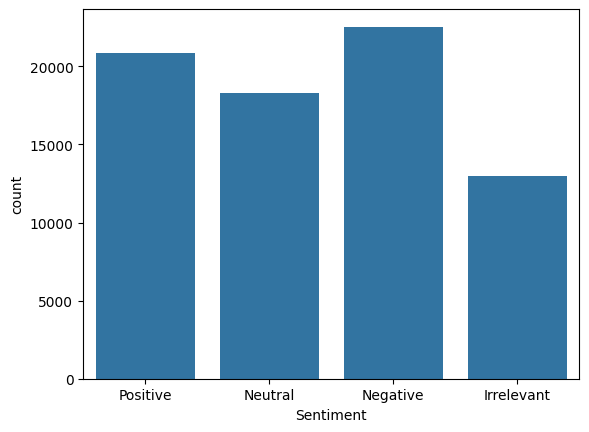

In [9]:
sns.countplot(x='Sentiment',data=data)
plt.show()

In [10]:
!python3 -m pip install nltk

In [11]:
import nltk
nltk.download('punkt')
nltk.download('Vader_lexicon')
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
text="hye my name is iman fatima"
token=word_tokenize(text)
print(token)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['hye', 'my', 'name', 'is', 'iman', 'fatima']


[nltk_data] Error loading Vader_lexicon: Package 'Vader_lexicon' not
[nltk_data]     found in index
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
!pip install nltk
import nltk

nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [17]:
sia.polarity_scores("i hate you ")

{'neg': 0.787, 'neu': 0.213, 'pos': 0.0, 'compound': -0.5719}

In [18]:
sia.polarity_scores(" i like him")

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}

In [19]:
sia.polarity_scores("this is worst  thing ever")

{'neg': 0.506, 'neu': 0.494, 'pos': 0.0, 'compound': -0.6249}

In [25]:
sentence = "I love this product! It's amazing."

sentiment_scores = sia.polarity_scores(sentence)

# Interpret the scores
if sentiment_scores['compound'] > 0.05:
    sentiment = "Positive"
elif sentiment_scores['compound'] < -0.05:
    sentiment = "Negative"
else:
    sentiment = "Neutral"

print(f"Sentence: {sentence}")
print(f"Sentiment: {sentiment}")

Sentence: I love this product! It's amazing.
Sentiment: Positive


In [27]:
data['compound'] = [sia.polarity_scores(str(x))['compound'] for x in data['Sentiment']]

In [26]:
sia = SentimentIntensityAnalyzer()

# Apply sentiment analysis to the 'Sentences' column
data['Sentiment'] = data['Sentence'].apply(lambda x: "Positive" if isinstance(x, str) and sia.polarity_scores(x)['compound'] > 0.05
                                         else ("Negative" if isinstance(x, str) and sia.polarity_scores(x)['compound'] < -0.05
                                               else "Neutral"))

# Now your DataFrame 'df' has a new column 'sentiment' with the sentiment labels
print(data[['Sentence', 'Sentiment']])


                                                Sentence Sentiment
0      I am coming to the borders and I will kill you...  Negative
1      im getting on borderlands and i will kill you ...  Negative
2      im coming on borderlands and i will murder you...  Negative
3      im getting on borderlands 2 and i will murder ...  Negative
4      im getting into borderlands and i can murder y...  Negative
...                                                  ...       ...
74676  Just realized that the Windows partition of my...  Positive
74677  Just realized that my Mac window partition is ...  Negative
74678  Just realized the windows partition of my Mac ...  Negative
74679  Just realized between the windows partition of...  Positive
74680  Just like the windows partition of my Mac is l...  Positive

[74681 rows x 2 columns]


In [28]:
data.head(10)

,Borderlands,Sentiment,Sentence,compound
0,Borderlands,Negative,I am coming to the borders and I will kill you...,-0.5719
1,Borderlands,Negative,im getting on borderlands and i will kill you ...,-0.5719
2,Borderlands,Negative,im coming on borderlands and i will murder you...,-0.5719
3,Borderlands,Negative,im getting on borderlands 2 and i will murder ...,-0.5719
4,Borderlands,Negative,im getting into borderlands and i can murder y...,-0.5719
5,Borderlands,Positive,So I spent a few hours making something for fu...,0.5574
6,Borderlands,Positive,So I spent a couple of hours doing something f...,0.5574
7,Borderlands,Positive,So I spent a few hours doing something for fun...,0.5574
8,Borderlands,Positive,So I spent a few hours making something for fu...,0.5574
9,Borderlands,Positive,2010 So I spent a few hours making something f...,0.5574


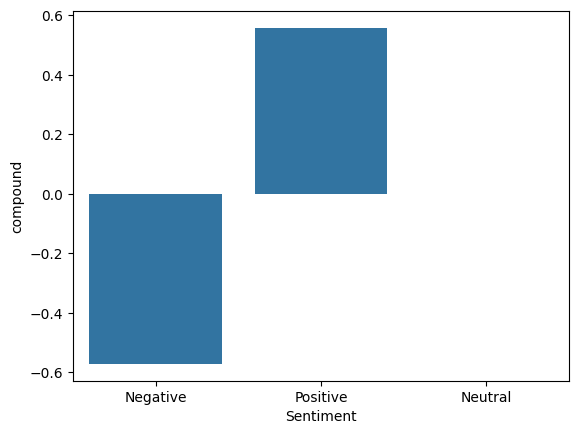

In [29]:
 sns.barplot(x='Sentiment', y='compound',data=data)
 plt.show()

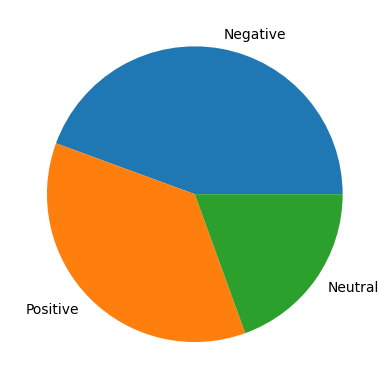

In [30]:
plt.pie(data['Sentiment'].value_counts(),labels=data['Sentiment'].unique(),data=data)
plt.show()

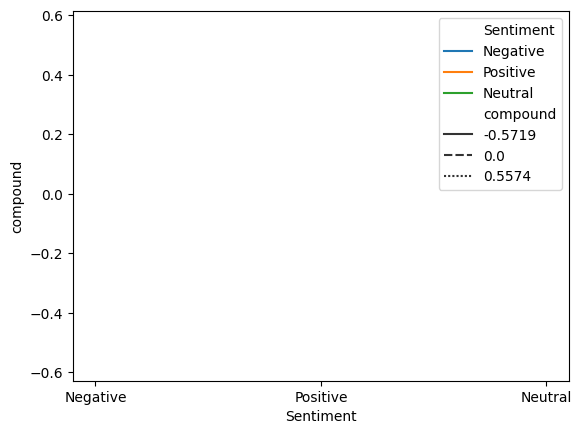

In [31]:
sns.lineplot(x="Sentiment", y="compound", hue="Sentiment", style='compound', data=data)
plt.show()